In [1]:
# Clustering methods
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

In [2]:
# a. Read the file with pandas
wine_data = pd.read_csv("../wine-labeled.csv")

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
# b. Drop the red/white and quality columns to produce an unlabeled
# data set.

wine_cleaned = wine_data.drop(columns=['quality','type'])

In [4]:
# c. Using sklearn.preprossing.MinMaxScaler scale all the data
scaler = MinMaxScaler()

input_data = scaler.fit_transform(wine_cleaned)

In [5]:
# d. Convert the data into its first three principal components
pca = PCA(n_components=3)

pca_data = pca.fit_transform(input_data)

In [6]:
# e. Plot the data onto its first two principal component planes and
# plot. Do there appear to be natural clusters?

plt.scatter(pca_data[:,0],pca_data[:,1], c=np.array(["r" if x=="red" else "b" for x in wine_data['type']]), alpha=0.5)
plt.show()

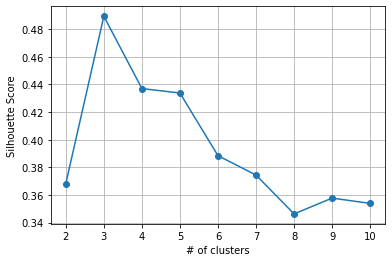

In [7]:
# f. Use KMeans and the silhouette score, what are the optimal number of clusters

sil_scores = []
clusters = []
cluster_class_data = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(pca_data[:,:2])

    S = silhouette_score(pca_data[:,:2], model.labels_)

    if len(sil_scores) > 0 and S > max(sil_scores):
        cluster_class_data = model.predict(pca_data[:,:2])
    
    sil_scores.append(S)
    clusters.append(i)
    
plt.plot(clusters, sil_scores, marker='o')
plt.grid()
plt.xlabel("# of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [8]:
# g. Plot the clusters in the first principal plane in different
# colors

plt.scatter(pca_data[:,0],pca_data[:,1], c=cluster_class_data)